In [1]:
# pandas para vusualizar los datos
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
# cargo los datos
data = pd.read_csv('data.csv')

In [3]:
# reviso como esta el dataset y que tipo de datos tiene
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14311 entries, 0 to 14310
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Frecuencia de transito nocturna   14311 non-null  int64 
 1   Zona                              14311 non-null  object
 2   Estrato                           14311 non-null  int64 
 3   Que tan agradable es transitar?   14311 non-null  int64 
 4   Las caracteristicas de la zona:   14311 non-null  int64 
 5   Cantidad de personas le generan:  14311 non-null  int64 
 6   Zona segura si hay presencia de:  14311 non-null  int64 
 7   Los andenes le permiten:          14311 non-null  int64 
 8   Medio de transporte que utiliza   14311 non-null  int64 
 9   Que sensacion experimenta en TP?  14311 non-null  int64 
 10  Hora militar                      14311 non-null  object
 11  Edad                              14311 non-null  int64 
 12  Actividad Principa

In [4]:
data.describe()

,Frecuencia de transito nocturna,Estrato,Que tan agradable es transitar?,Las caracteristicas de la zona:,Cantidad de personas le generan:,Zona segura si hay presencia de:,Los andenes le permiten:,Medio de transporte que utiliza,Que sensacion experimenta en TP?,Edad,Actividad Principal,Escolaridad
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,2.198449,3.415624,2.717770,3.495563,3.984418,2.637761,1.567815,2.960310,4.015582,32.691286,1.988470,6.017679
std,0.832952,9.331858,0.776807,5.657073,4.840644,3.070613,0.568933,4.435148,5.179837,13.001661,4.893464,3.604994
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,22.000000,1.000000,5.000000
50%,2.000000,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,1.000000,2.000000,29.000000,1.000000,6.000000
75%,3.000000,3.000000,3.000000,5.000000,5.000000,3.000000,2.000000,3.000000,4.000000,40.000000,2.000000,7.000000
max,3.000000,99.000000,4.000000,99.000000,99.000000,99.000000,3.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [5]:
data = data.replace({99:0})

# inicio explorando los datos

In [6]:
data['Frecuencia de transito nocturna'].unique()

array([1, 3, 2])

In [7]:
data.groupby('Frecuencia de transito nocturna')['Frecuencia de transito nocturna'].count()

Frecuencia de transito nocturna
1    3826
2    3819
3    6666
Name: Frecuencia de transito nocturna, dtype: int64

mas de la mitad de los encuestados dicen que transitan frecuente y muy frecuente en la noche

# Exploro en que zonas los encuestados transitan frecuente y muy frecuente

In [8]:
muy_frecuente = data[data['Frecuencia de transito nocturna']==3]

<AxesSubplot:xlabel='count', ylabel='Zona'>

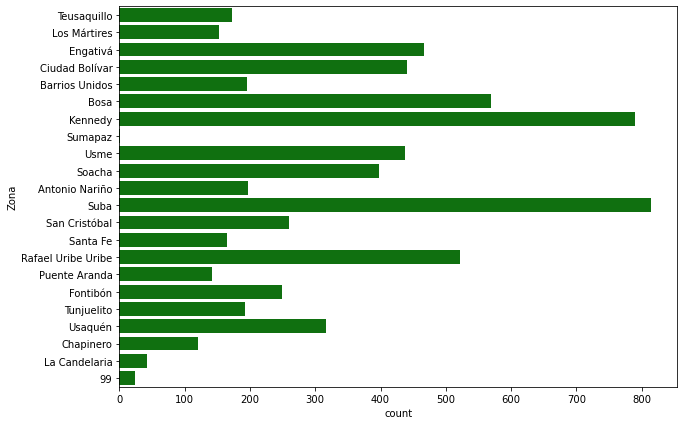

In [9]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y='Zona', data=muy_frecuente, color='g')

In [10]:
muy_frecuente['Estrato'].unique()

array([4, 3, 2, 1, 5, 6, 0])

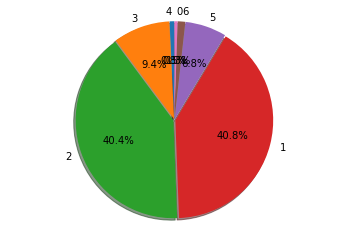

In [11]:

labels = muy_frecuente['Estrato'].unique()
sizes = muy_frecuente.groupby('Estrato')['Estrato'].count()
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

de los encuestados bosa, kennedy y suba son las personas que mas transitan en la la noche, la gran mayoria de son personas de estratos 2 y 3

In [12]:
data['Estrato'].unique()

array([3, 2, 1, 4, 6, 5, 0])

# estratos 1,2,3 y 4 por Zona

<AxesSubplot:xlabel='Count', ylabel='Zona'>

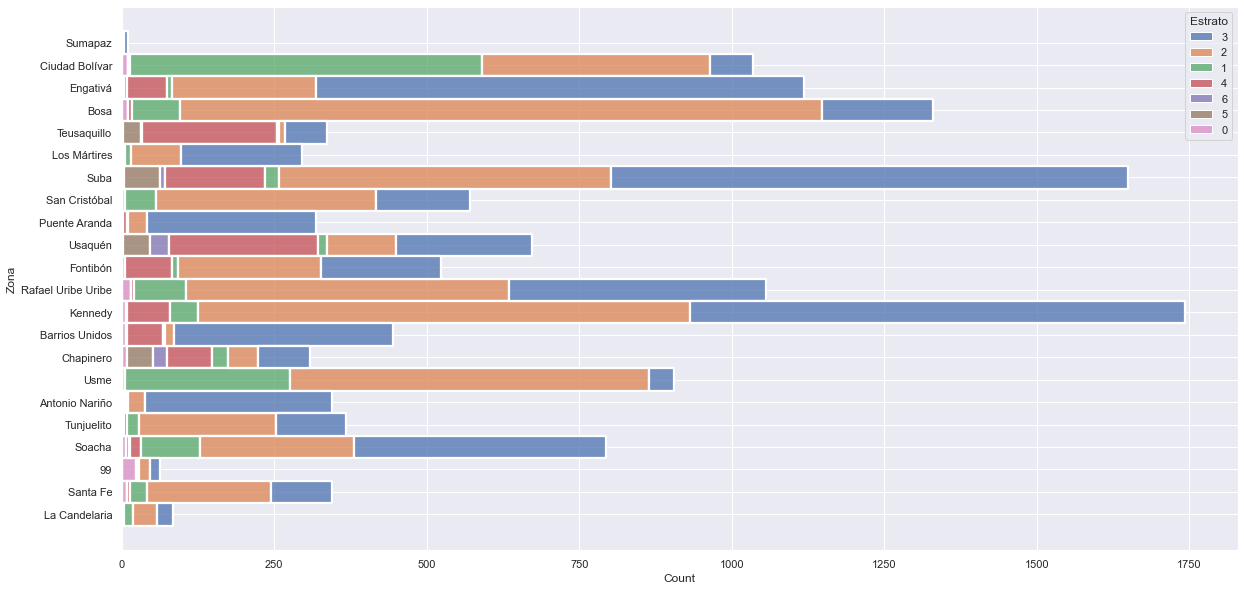

In [13]:
data['Estrato'] = data['Estrato'].replace({1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',0:'0'})
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data=data, y="Zona", hue="Estrato", multiple="stack")

# continuo explorando los datos

In [14]:
data['Que tan agradable es transitar?'].unique()

array([2, 1, 4, 3])

In [15]:
data.groupby('Que tan agradable es transitar?')['Que tan agradable es transitar?'].count()

Que tan agradable es transitar?
1     429
2    5620
3    5823
4    2439
Name: Que tan agradable es transitar?, dtype: int64

exploro las personas que respondieron que es desagradable trasitar en horas de la noche y que lo hacen frecuentemente

In [16]:
desagradable = pd.concat([data[(data['Que tan agradable es transitar?']==4)],data[(data['Frecuencia de transito nocturna']==3)]])

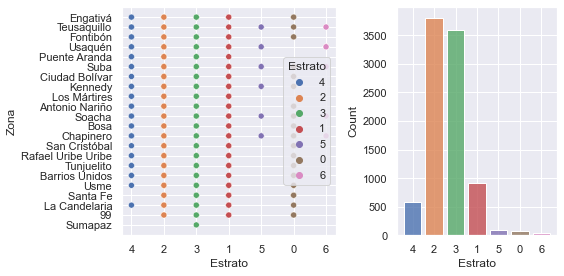

In [17]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=desagradable, x="Estrato", y="Zona", hue="Estrato", ax=axs[0])
sns.histplot(data=desagradable, x="Estrato", hue="Estrato", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

los encuestados de los estratos 2 y 3 son los que mas transitan en la noche y respondieron que es desagradable

In [18]:
data['Las caracteristicas de la zona:'].unique()

array([5, 1, 2, 3, 6, 4, 7, 0])

In [19]:
data.groupby('Las caracteristicas de la zona:')['Las caracteristicas de la zona:'].count()

Las caracteristicas de la zona:
0      46
1    2674
2    2333
3    4310
4     950
5    2841
6     903
7     254
Name: Las caracteristicas de la zona:, dtype: int64

hay una importante cantidad de encuestados que respondieron que las caracteristicas de la zona es peligrosa,
exploro que zonas son.

In [20]:
peligrosa = data[data['Las caracteristicas de la zona:']== 3]

<AxesSubplot:xlabel='Count', ylabel='Zona'>

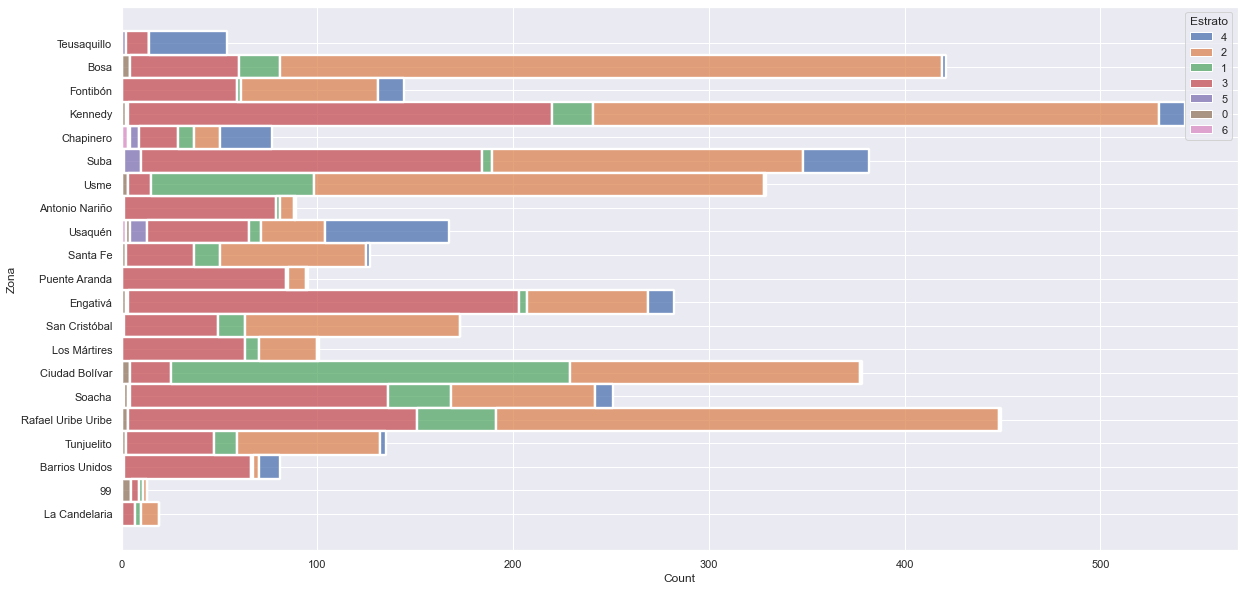

In [21]:
sns.histplot(data=peligrosa, y="Zona", hue="Estrato", multiple="stack")

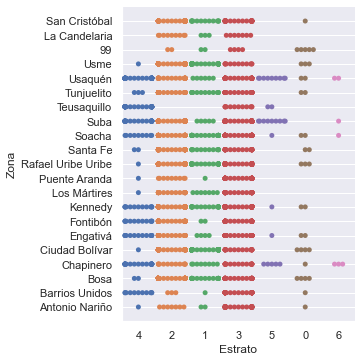

In [22]:
sns.catplot(x="Estrato", y="Zona", hue="Estrato", kind="swarm", data=peligrosa)

zonas con estratos 1,2 y 3 son las que los ecuestados consideraron que son peligrosas

# sigo explorando

In [23]:
data['Cantidad de personas le generan:'].unique()

array([2, 3, 1, 4, 7, 5, 6, 8, 0])

In [24]:
data.groupby('Cantidad de personas le generan:')['Cantidad de personas le generan:'].count()

Cantidad de personas le generan:
0      30
1    3205
2    1569
3    1254
4    3133
5    1711
6    1412
7    1589
8     408
Name: Cantidad de personas le generan:, dtype: int64

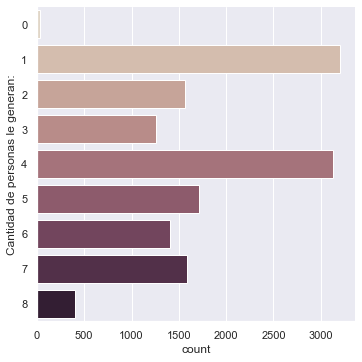

In [25]:
sns.catplot(y="Cantidad de personas le generan:", kind="count", palette="ch:.25", data=data)

hay una catidad de personas importante que respondieron que las personas de la zona les generan tranquilidad y miedo

# Ahora exploro con las localidades

In [26]:
tranquilidad = data[data['Cantidad de personas le generan:']== 1]

<AxesSubplot:xlabel='count', ylabel='Zona'>

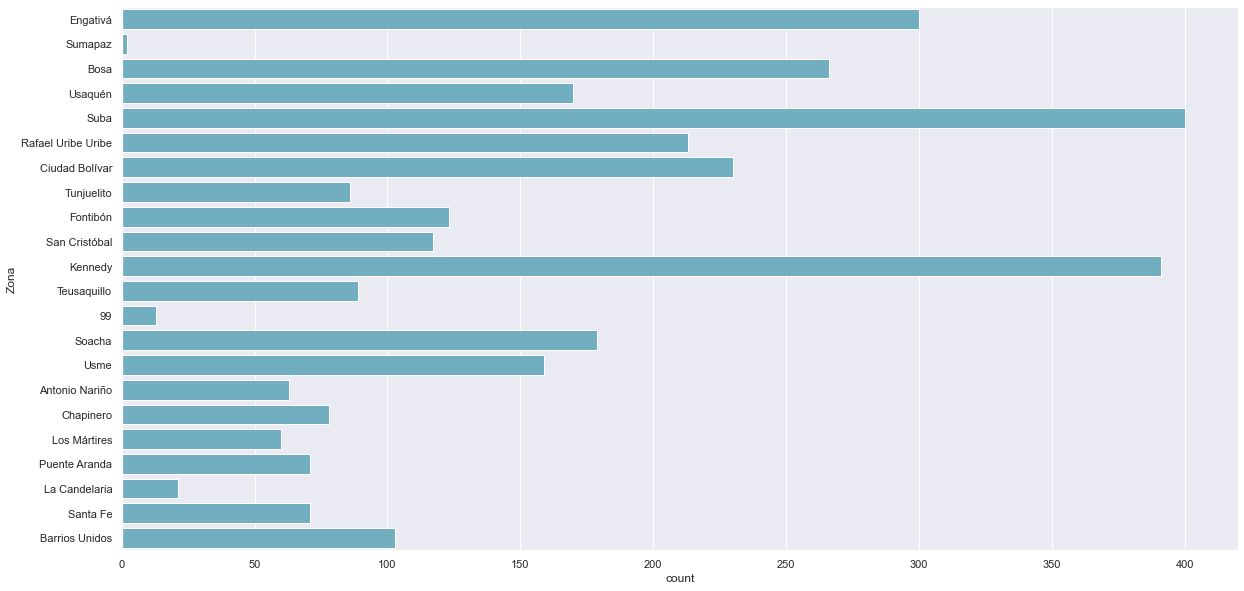

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(y="Zona", data=tranquilidad, color="c")

engativa y suba son las localidades donde las personas que transitan generan mas tranquilidad

In [28]:
miedo = data[data['Cantidad de personas le generan:']== 4]

<AxesSubplot:xlabel='count', ylabel='Zona'>

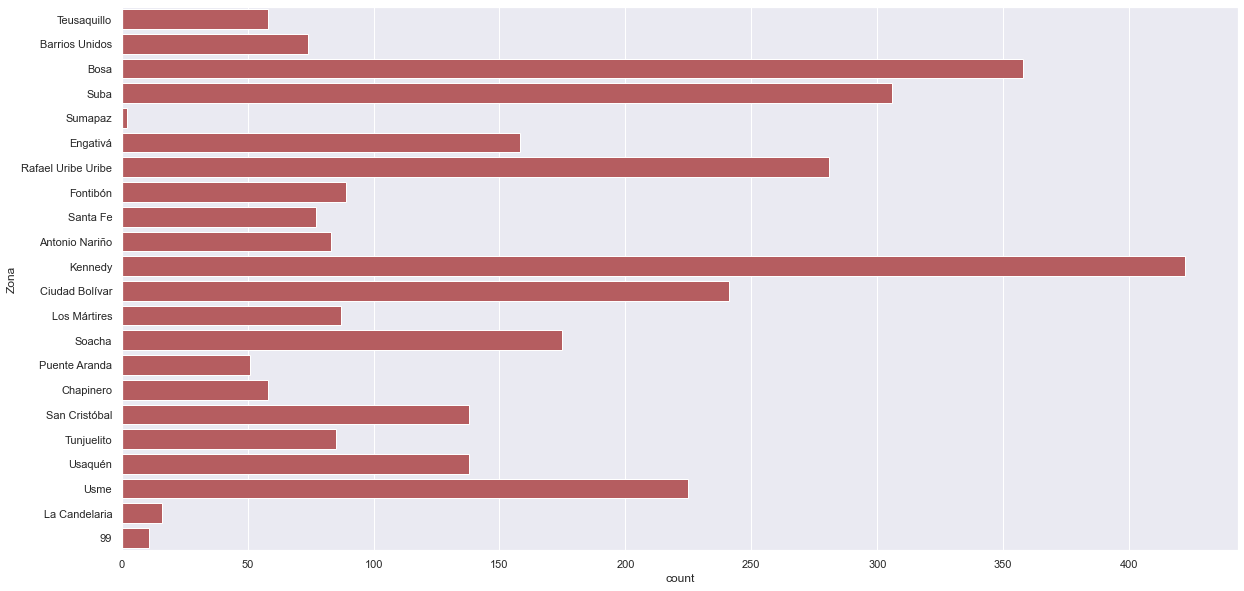

In [29]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(y="Zona", data=miedo, color="r")

bosa y kennedy son las localidades donde las personas que transitan generan mas miedo

# sigo explorando

In [30]:
data['Zona segura si hay presencia de:'].unique()

array([1, 2, 3, 4, 0])

In [31]:
data.groupby('Zona segura si hay presencia de:')['Zona segura si hay presencia de:'].count()

Zona segura si hay presencia de:
0      13
1    3662
2     727
3    8290
4    1619
Name: Zona segura si hay presencia de:, dtype: int64

la presencia de fuerza publica genera seguridad, pero los encuestados respondieron que combinando fuerza publica con vigilancia privada genera mas seguridad.

# sigo explorando

In [32]:
data['Los andenes le permiten:'].unique()

array([1, 2, 3])

In [33]:
data.groupby('Los andenes le permiten:')['Los andenes le permiten:'].count()

Los andenes le permiten:
1    6745
2    7006
3     560
Name: Los andenes le permiten:, dtype: int64

hay una gran cantidad de encuestados que respondieron que los andenes les permiten transitar con dificultad.

In [34]:
data['Los andenes le permiten:'] = data['Los andenes le permiten:'].replace({1:'1',2:'2',3:'3'})

<AxesSubplot:xlabel='Count', ylabel='Zona'>

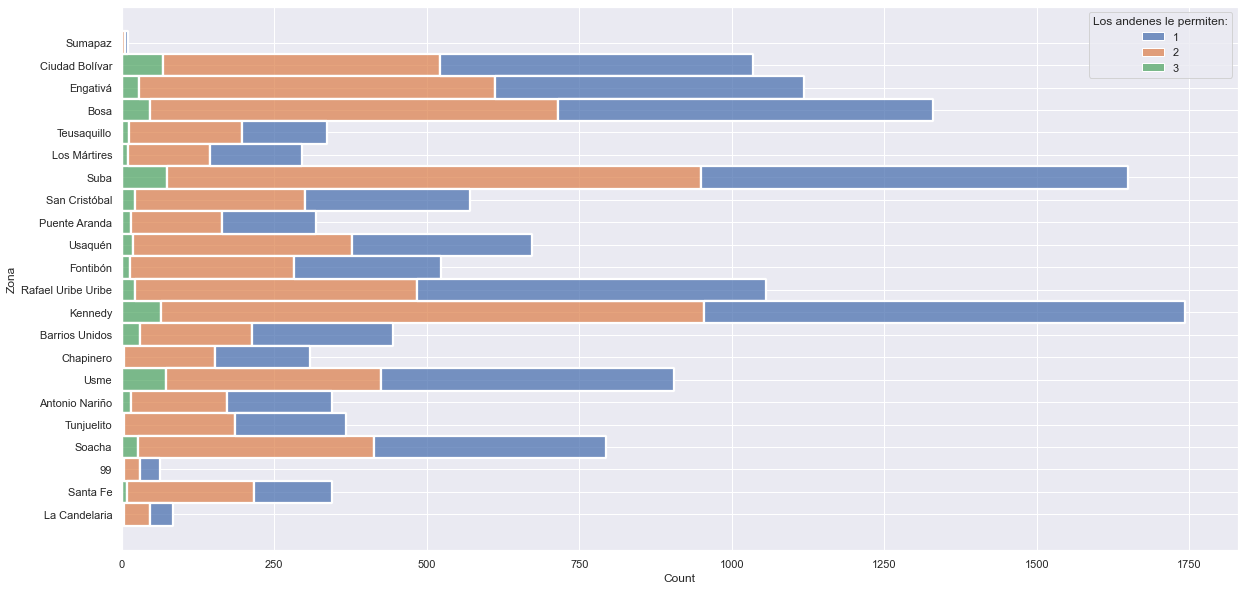

In [35]:
sns.histplot(data=data, y="Zona", hue="Los andenes le permiten:", multiple="stack")

usme, kennedy, suba y ciudad bolivar son las zonas donde los encuestados respondieron que no hay caminos.

<AxesSubplot:xlabel='Count', ylabel='Estrato'>

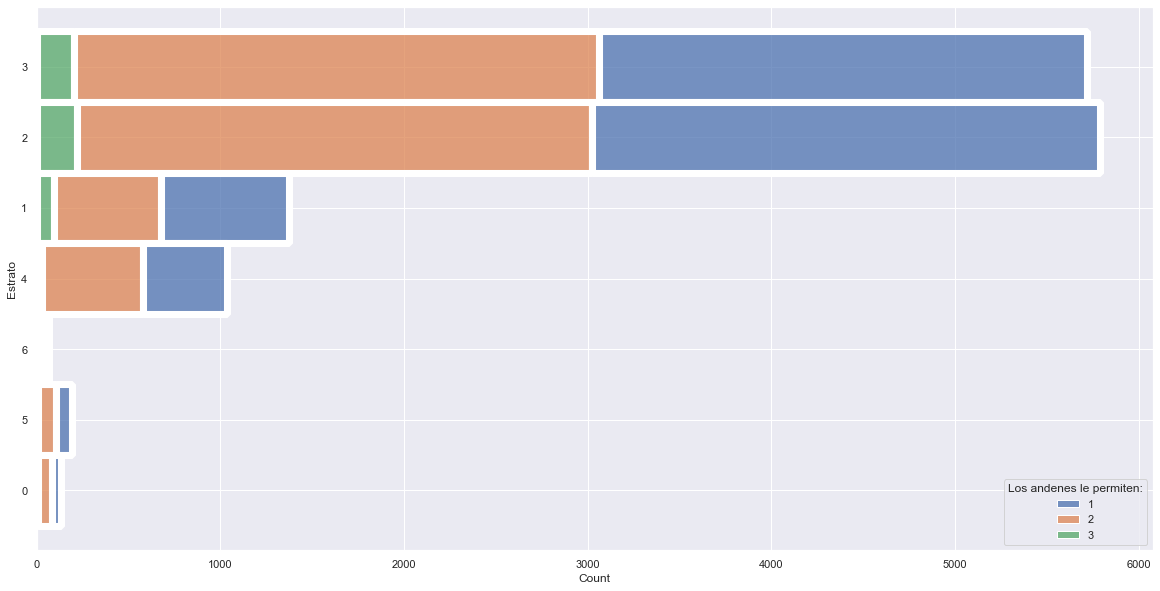

In [36]:
sns.histplot(data=data, y="Estrato", hue="Los andenes le permiten:", multiple="stack")

si lo analizo por estratos son los 1,2 y 3 las personas que respondieron que no hay caminos en la zona

# Sigo con la exploracíon

In [37]:
data['Medio de transporte que utiliza'].unique()

array([ 1,  3,  6,  4,  5,  9, 10,  7, 12,  8, 11, 13,  2,  0])

In [38]:
data.groupby('Medio de transporte que utiliza')['Medio de transporte que utiliza'].count()

Medio de transporte que utiliza
0       18
1     7638
2       92
3     3046
4     1602
5      395
6      172
7       94
8       26
9      294
10     251
11      38
12     617
13      28
Name: Medio de transporte que utiliza, dtype: int64

Transmilenio, Buses, Bus, buseta y colectivo son los tranportes mas usados por los encuestados

In [39]:
data['Que sensacion experimenta en TP?'].unique()

array([ 5,  1,  2,  3,  7, 11,  6,  9,  4, 12, 10,  8, 13,  0])

In [40]:
data.groupby('Que sensacion experimenta en TP?')['Que sensacion experimenta en TP?'].count()

Que sensacion experimenta en TP?
0       22
1     2982
2     5109
3     1895
4      991
5      497
6      246
7      143
8       74
9      166
10     185
11     698
12    1075
13     228
Name: Que sensacion experimenta en TP?, dtype: int64

In [41]:
miedo = data[data['Que sensacion experimenta en TP?']== 3]

<AxesSubplot:xlabel='Medio de transporte que utiliza', ylabel='count'>

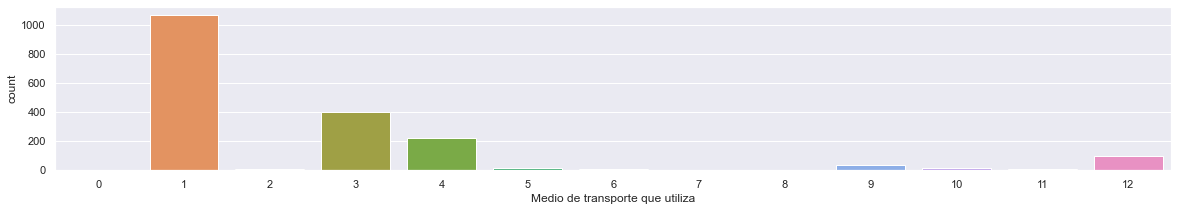

In [42]:
sns.set(rc={'figure.figsize':(20,3)})
sns.countplot(miedo['Medio de transporte que utiliza'])

los transportes que mas generan miedo son el transmilenio y sitp

# sigo con la exploración

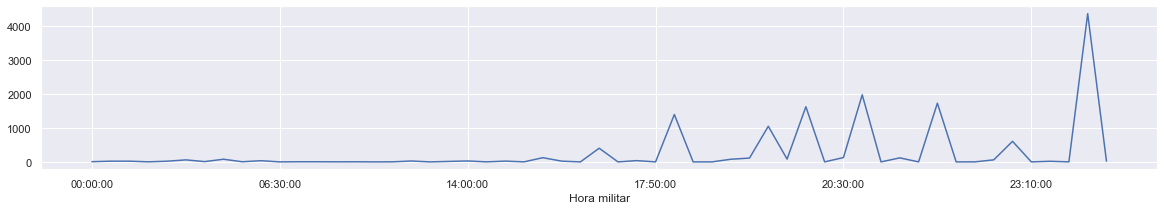

In [43]:
vals = data.groupby('Hora militar')['Hora militar'].count().plot()

los encuestados respondieron que apartir de las 6 de la tarde es peligroso transitar en espacio publico.

In [44]:
data['Edad'].describe()

count    14311.000000
mean        32.580602
std         12.857285
min          0.000000
25%         22.000000
50%         29.000000
75%         40.000000
max         86.000000
Name: Edad, dtype: float64

<AxesSubplot:xlabel='Edad', ylabel='count'>

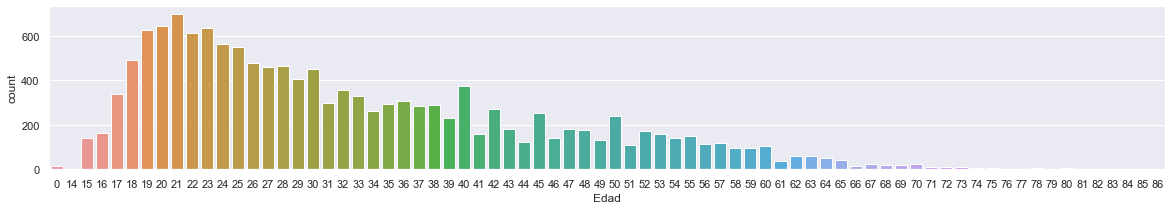

In [45]:
sns.countplot(data['Edad'])

hay encuestados desde la edad de los 14 años hasta los 99 años, menos del 75% de los ecuestados son menores de 40 años.

# sigo con la exploracíon

In [46]:
data['Actividad Principal'].unique()

array([1, 2, 5, 4, 3, 7, 0, 6])

In [47]:
data.groupby('Actividad Principal')['Actividad Principal'].count()

Actividad Principal
0      34
1    9084
2    2055
3    1866
4     321
5     766
6     110
7      75
Name: Actividad Principal, dtype: int64

la inmensa mayoria trabajan y estudian.

In [48]:
trabajan = data[data['Actividad Principal']==1]

<AxesSubplot:xlabel='Edad', ylabel='count'>

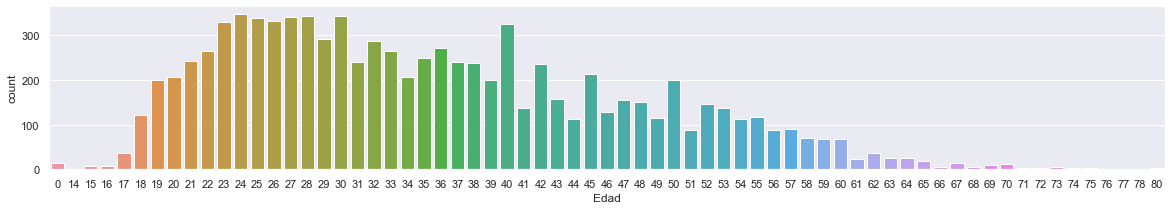

In [49]:
sns.countplot(trabajan['Edad'])

la gran mayoria de personas que trabajan estan apartir de los 18 años hasta los 80 años de edad

In [50]:
estudian = data[data['Actividad Principal']==2]

<AxesSubplot:xlabel='Edad', ylabel='count'>

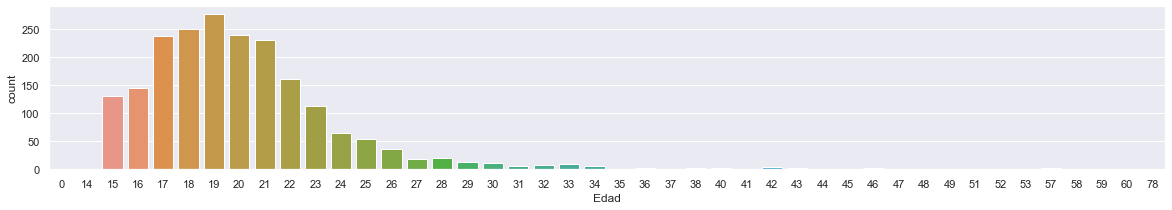

In [51]:
sns.countplot(estudian['Edad'])

la gran maroria de estudiantes son personas menores de 30 años

In [52]:
estudian_y_estudian = data[data['Actividad Principal']==3]

<AxesSubplot:xlabel='Edad', ylabel='count'>

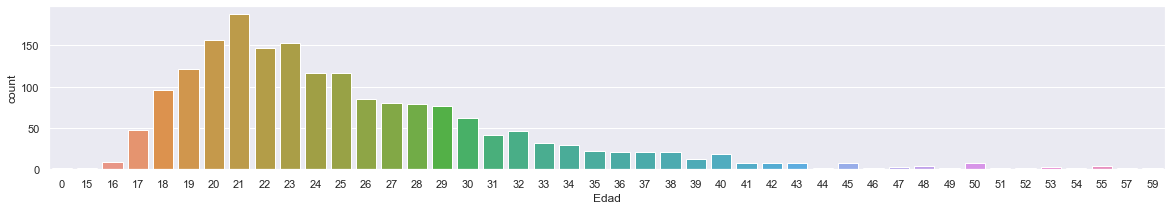

In [53]:
sns.countplot(estudian_y_estudian['Edad'])

la distribucion se parece mucho a la de los estidiantes

In [54]:
pensionados = data[data['Actividad Principal']==6]

<AxesSubplot:xlabel='Edad', ylabel='count'>

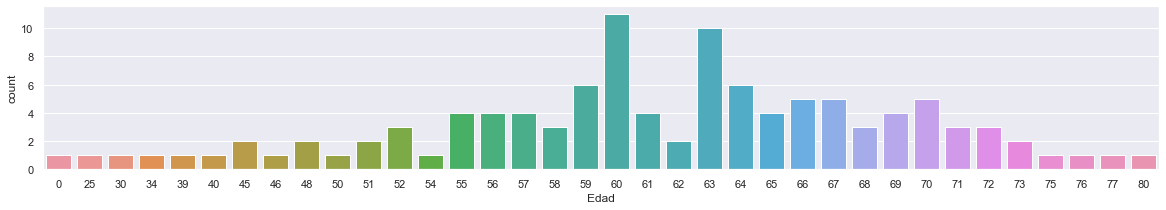

In [55]:
sns.countplot(pensionados['Edad'])

la gran mayoria de pensionados son personas apartir de los 55 años, es curioso que hay personas menores de 30 y 40 años que respondieron que son pensionados.

In [56]:
data['Frecuencia de transito nocturna'] = data['Frecuencia de transito nocturna'].replace({1:'1',2:'2',3:'3'})
data['Actividad Principal'] = data['Actividad Principal'].replace({1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',0:'0'})

<AxesSubplot:xlabel='Frecuencia de transito nocturna', ylabel='Count'>

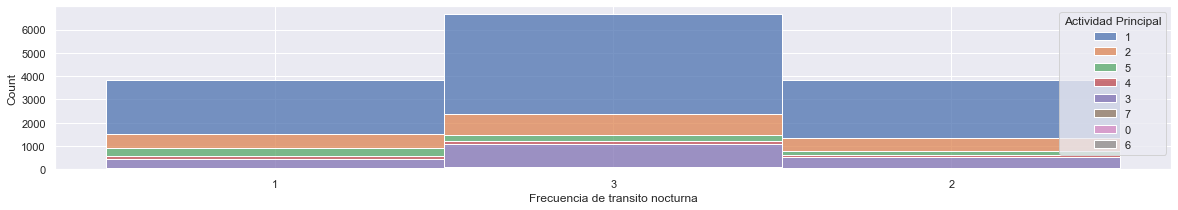

In [57]:
sns.histplot(data=data, x="Frecuencia de transito nocturna", hue="Actividad Principal", multiple = "stack")

las personas que trabajan solamente y las personas que trabajan y estudian son las que mas transitan en horas de la noche.

# Sigo explorando los datos

In [58]:
data['Escolaridad'].unique()

array([8, 6, 3, 7, 9, 5, 0, 4, 1, 2])

In [59]:
data.groupby('Escolaridad')['Escolaridad'].count()

Escolaridad
0      17
1      51
2     273
3     624
4    1451
5    3866
6    3305
7    1532
8    2449
9     743
Name: Escolaridad, dtype: int64

cantidad importante de ecuestados con Educación técnica/tecnológica pero pocos encuestados con Universitaria completa y postgrado.

In [60]:
universidad = data[data['Escolaridad']== 8]

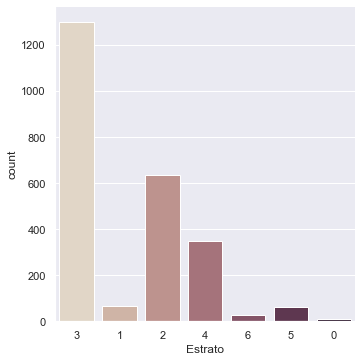

In [61]:
sns.catplot(x="Estrato", kind="count", palette="ch:.25", data=universidad)

las personas que tiene universidad culminada la gran mayoria son estrato 3

In [62]:
postgrado = data[data['Escolaridad'] == 9]

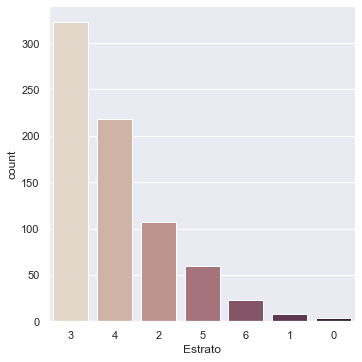

In [63]:
sns.catplot(x="Estrato", kind="count", palette="ch:.25", data=postgrado)

la gran mayoria de personas con postgrado son estrato 3 y 4

el nivel de educación si influye en el estrato

# Por ultimo un algoritmo de clasificacíon para ver si hay mas patrones en los datos

In [64]:
from sklearn.cluster import MiniBatchKMeans

In [65]:
X = data.drop(['Zona','Hora militar'],axis = 1)

In [66]:
clasificador = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)

In [67]:
data['Grupo'] = clasificador.predict(X)

In [68]:
data['Grupo'].sort_values().unique()

array([0, 1, 2, 3], dtype=int32)

escogí que el numero de clusters es de 4 es decir que el dataset se va a clasificar en 4 partes o cuatro grupos

In [69]:
data.groupby('Grupo')['Grupo'].count()

Grupo
0    6365
1    2414
2    1554
3    3978
Name: Grupo, dtype: int64

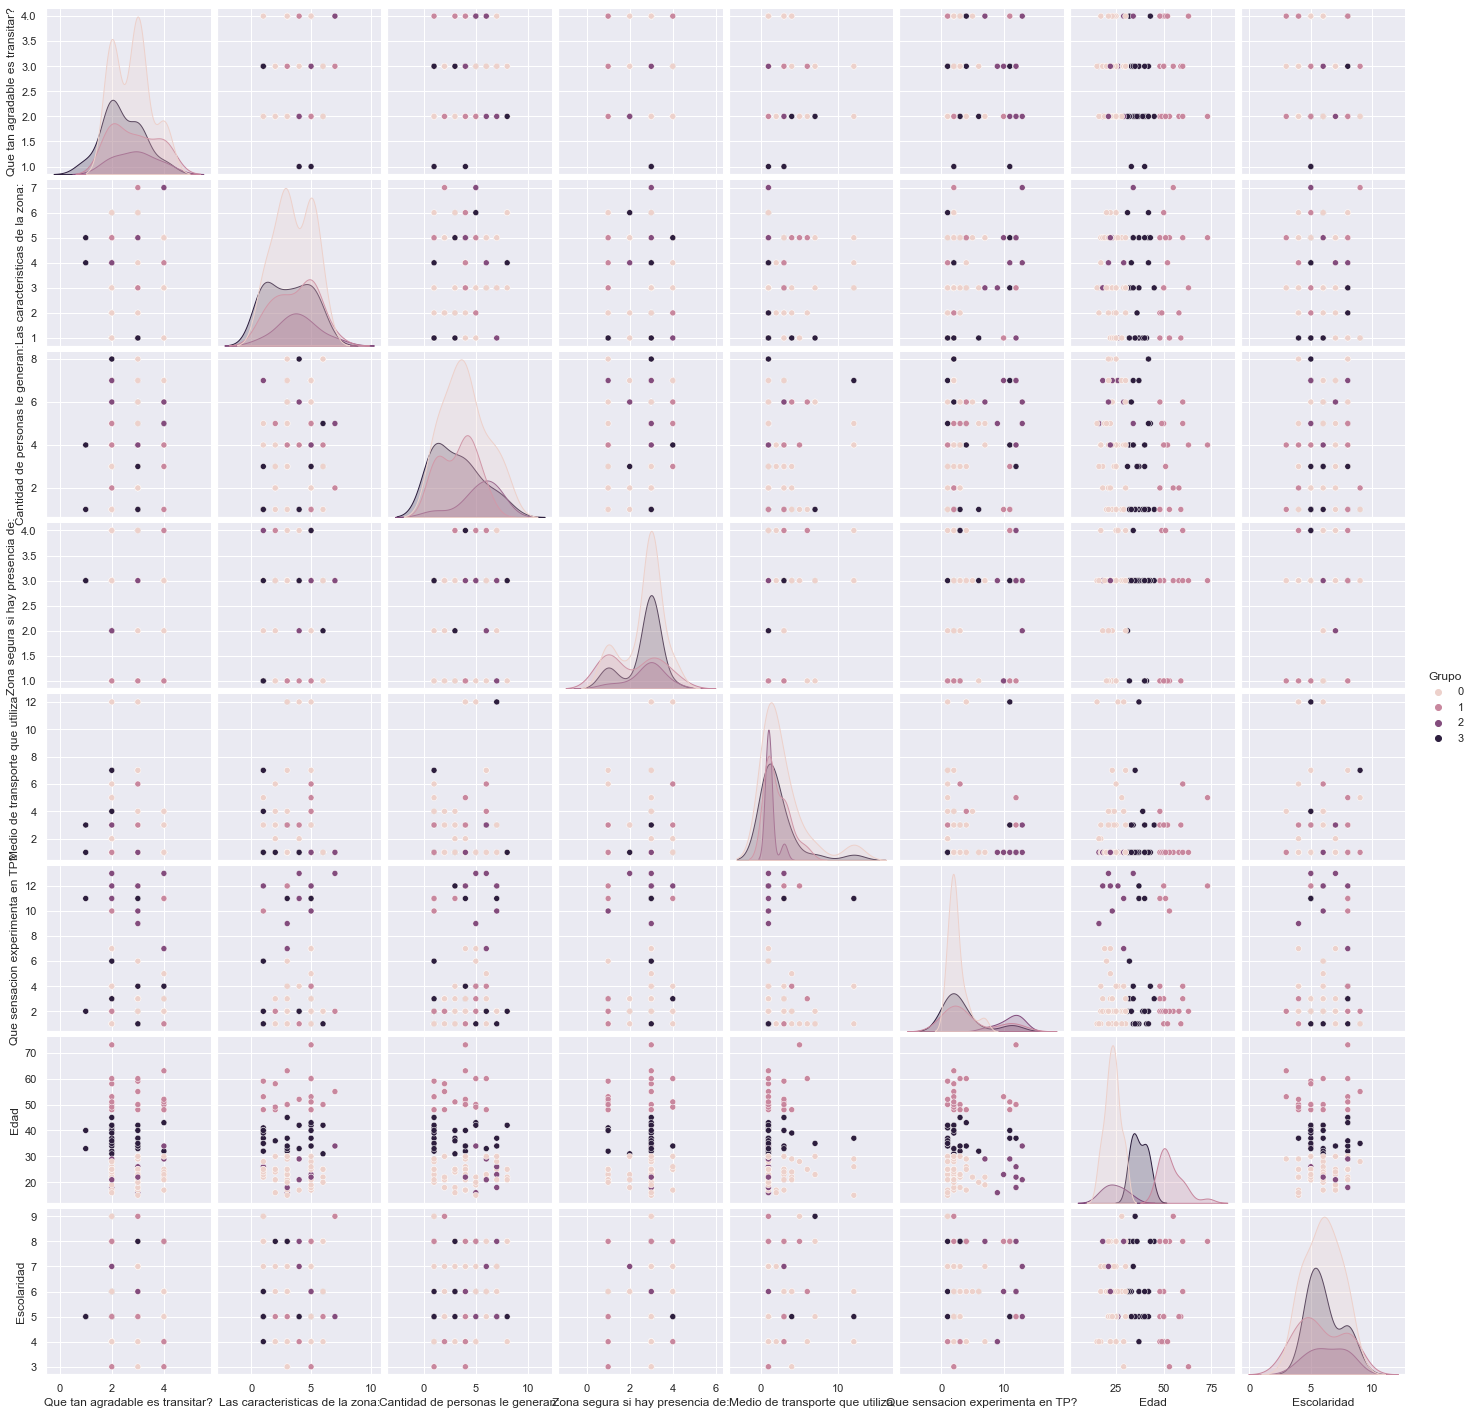

In [70]:
sns.pairplot(data.sample(100), hue='Grupo')

grafico las variables que mas me estan aportando información

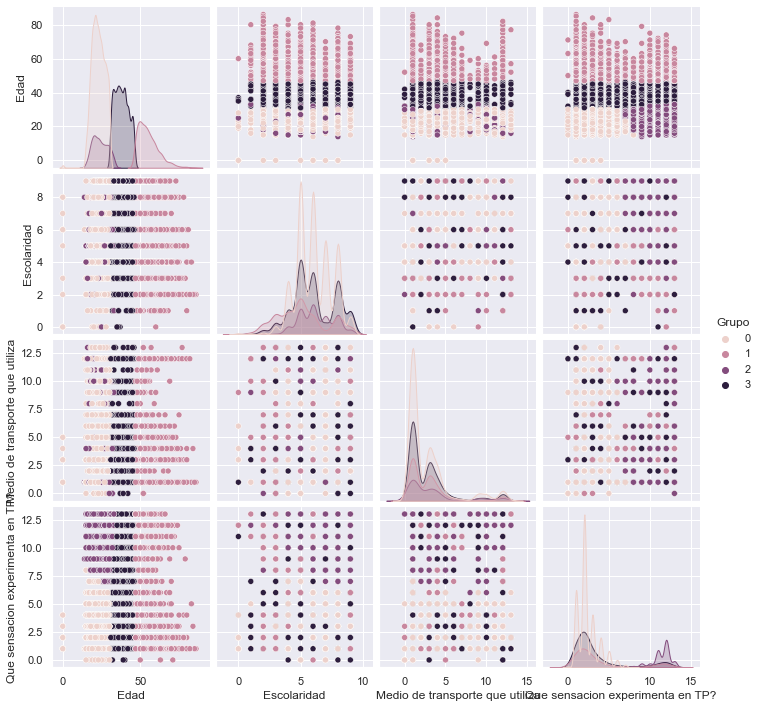

In [71]:
sns.pairplot(data[['Estrato','Edad','Escolaridad','Medio de transporte que utiliza','Que sensacion experimenta en TP?','Actividad Principal','Grupo']], hue='Grupo')

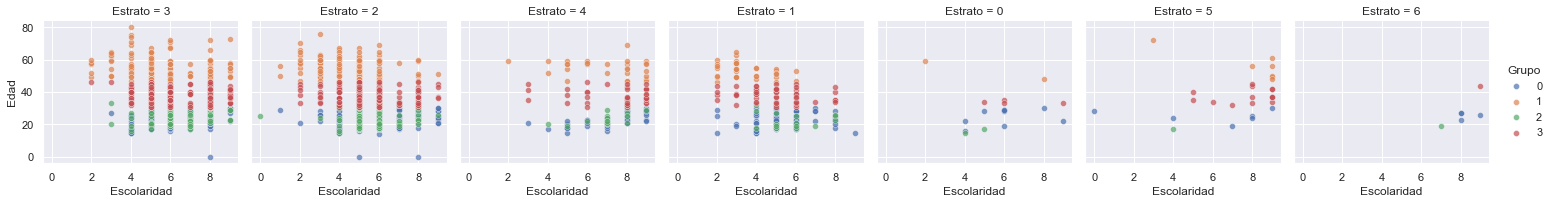

In [72]:
g = sns.FacetGrid(data.sample(2000), col="Estrato", hue="Grupo")
g.map(sns.scatterplot, "Escolaridad", "Edad", alpha=.7)
g.add_legend()

la edad de los encuestados fue la variable que mas influyo cuando el algoritmo dividio los clusters

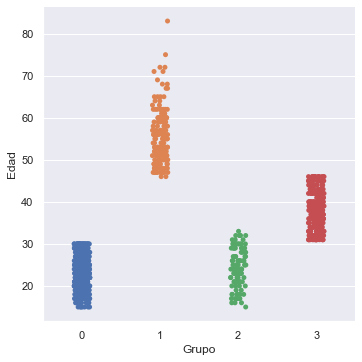

In [73]:
sns.catplot(x="Grupo", y="Edad", data=data.sample(1000))

en la grafica de arriba se puede ver claramente como estan divididos los grupos con respecto a la edad

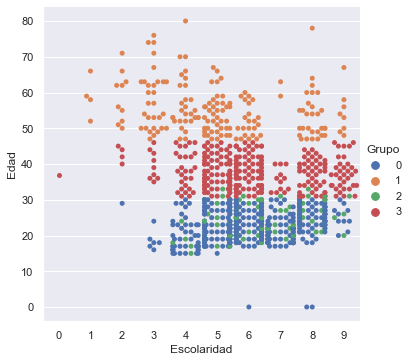

In [74]:
sns.catplot(x="Escolaridad", y="Edad", hue="Grupo", kind="swarm", data=data.sample(1000))

en la grafica de arriba grafico la edad de los encuestados con respecto a la escolaridad, hay encuestados con postgrado mayores de 20 años.

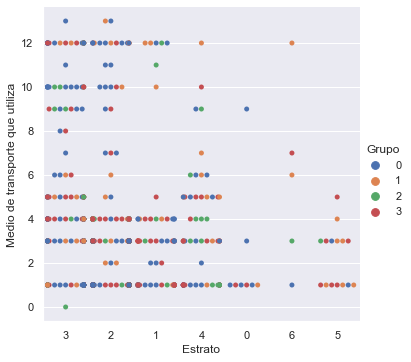

In [75]:
sns.catplot(x="Estrato", y="Medio de transporte que utiliza", hue="Grupo", kind="swarm", data=data.sample(1000))

los grupos estan en todos dos los estratos

el algoritmo de clasificación dividio los los grupos basandose en la edad de los encuestados.